<a href="https://colab.research.google.com/github/evrimakgul/Deep_Learning/blob/master/Convets_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

This classification assignment will use the CIFAR 10 library which is part of Keras. https://www.cs.toronto.edu/~kriz/cifar.html CIFAR 10 is a collection of 50,000 training and 10,000 test images of 10 differnt classes of objects.  Using convolutional neural networks (convets, or CNN) to get the model accuracy above 80%

In [0]:
# Load the libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%tensorflow_version 2.x
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend, models, regularizers, layers # We will be using "Conv2D, MaxPool2D, Dropout, Dense" from layers"
from tensorflow.keras.layers import Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# Load the CIFAR 10 library from Keras
from tensorflow.keras.datasets import cifar10
(train_data, train_label), (test_data, test_label) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
train_data.shape, train_label.shape

((50000, 32, 32, 3), (50000, 1))

The CIFAR-10 dataset consists of 60000 32x32 colour images (RGB, therefore in 3 channels) in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Thus, our *training_data* will be 50000x32x32x3 (where 50000 are the amount of input data (# of image), 32x32 are the resolution of each image and 3 is the color channels referring to red, green and blue) and the *training_label* will be 50000x10; 10 representing 10 different labels. A nice explanation of the CIFAR data set can be found here: https://www.cs.toronto.edu/~kriz/cifar.html


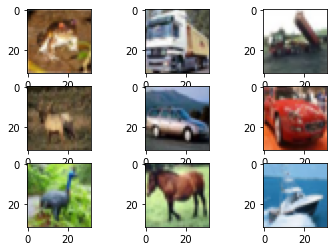

In [6]:
# View a few of the images
for i in range(0, 9):
    plt.subplot(3, 3, + 1 + i)
    plt.imshow(train_data[i])
plt.show()

In [7]:
# Prepare the train and test images for a CNN
train_data = train_data.reshape((50000, 32, 32, 3)).astype('float32')/train_data.max()
test_data = test_data.reshape((10000, 32, 32, 3)).astype('float32')/test_data.max()

train_data[0].shape, train_data[0][0]

((32, 32, 3), array([[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        [0.26666668, 0.21176471, 0.16470589],
        [0.38431373, 0.28627452, 0.20392157],
        [0.46666667, 0.35686275, 0.24705882],
        [0.54509807, 0.41960785, 0.29411766],
        [0.5686275 , 0.43137255, 0.3137255 ],
        [0.58431375, 0.45882353, 0.34901962],
        [0.58431375, 0.47058824, 0.3647059 ],
        [0.5137255 , 0.40392157, 0.3019608 ],
        [0.49019608, 0.3882353 , 0.29803923],
        [0.5568628 , 0.4509804 , 0.35686275],
        [0.5647059 , 0.4392157 , 0.3372549 ],
        [0.5372549 , 0.4117647 , 0.30980393],
        [0.5058824 , 0.38039216, 0.2784314 ],
        [0.5372549 , 0.41568628, 0.30980393],
        [0.5254902 , 0.41568628, 0.29803923],
        [0.4862745 , 0.38039216, 0.2509804 ],
        [0.54509807, 0.44313726, 0.30588236],
        [0.54509807, 0.4392157 , 0.29411766],
        [0.52156866, 

In [0]:
# Prepare the train and test data for a CNN
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [0]:
# Split the data into a train and validation block
training_data, val_data, training_label, val_label = train_test_split(train_data, train_label, test_size=0.25, random_state=42)

### Review literature for CNN architectures and build at least 3 different architectures with varying depths, kernels, and normalization functions.  Be sure to split your data into a validation block and monitor loss and accuracy with graphs.  Build, compile, monitor, validate, and test each CNN architecture in one cell.  Try to get one of your CNN architectures to have a test accauracy above 80%.
      
#### Here are some links to get you started on reviewing CNN architectures.
#### https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist
#### https://medium.com/datadriveninvestor/five-powerful-cnn-architectures-b939c9ddd57b 

Epoch 1/400
32/32 [==============================] - 2s 72ms/step - loss: 2.2975 - accuracy: 0.2282 - val_loss: 2.3882 - val_accuracy: 0.0946
Epoch 2/400
32/32 [==============================] - 2s 56ms/step - loss: 1.8355 - accuracy: 0.3407 - val_loss: 2.5820 - val_accuracy: 0.0946
Epoch 3/400
32/32 [==============================] - 2s 56ms/step - loss: 1.6692 - accuracy: 0.3964 - val_loss: 2.6326 - val_accuracy: 0.0946
Epoch 4/400
32/32 [==============================] - 2s 57ms/step - loss: 1.5579 - accuracy: 0.4350 - val_loss: 2.5354 - val_accuracy: 0.0998
Epoch 5/400
32/32 [==============================] - 2s 57ms/step - loss: 1.4734 - accuracy: 0.4679 - val_loss: 2.5835 - val_accuracy: 0.1156
Epoch 6/400
32/32 [==============================] - 2s 57ms/step - loss: 1.3938 - accuracy: 0.5002 - val_loss: 2.4565 - val_accuracy: 0.2102
Epoch 7/400
32/32 [==============================] - 2s 57ms/step - loss: 1.3313 - accuracy: 0.5199 - val_loss: 2.6375 - val_accuracy: 0.1984
Epoch 

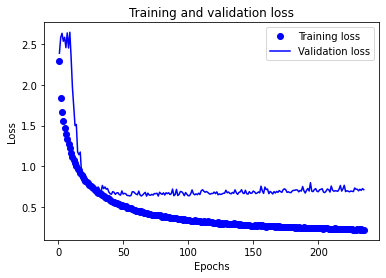

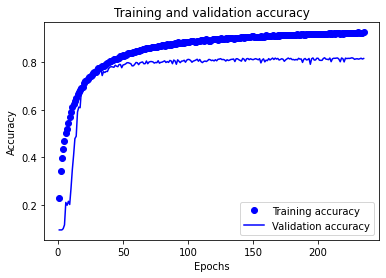

313/313 [==============================] - 1s 3ms/step - loss: 0.7043 - accuracy: 0.8134
['loss', 'accuracy']
[0.7042887210845947, 0.8133999705314636]
         loss  accuracy  val_loss  val_accuracy
230  0.223499  0.925733  0.698204       0.81312
231  0.222847  0.924613  0.717073       0.81440
232  0.223927  0.924907  0.703680       0.81696
233  0.222471  0.924747  0.725422       0.81344
234  0.218332  0.926213  0.712006       0.81576


Total amount of time to execute this process is:  443.64507508277893


In [0]:
start = time.time()

backend.clear_session()
model = models.Sequential()

# Layer 1: Input Data and Convnet no Max_Pooling
model.add(layers.Conv2D(10, (5,5), activation='relu', padding='same', input_shape=training_data.shape[1:],)) # outputs 32x32x10/10240 // 5x5x3x10/760        
model.add(BatchNormalization())
model.add(layers.Conv2D(20, (3,3), activation='relu', padding='same', input_shape=training_data.shape[1:],)) # outputs 32x32x20/20480 // 3x3x10x20/1820
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2)))        # 16x16x20
model.add(layers.Dropout(0.25))


# Layer 2: Convnet with Dropout and BatchNormalization but no Max_Pooling
model.add(layers.Conv2D(30, (5,5), activation='relu', padding='same')) # outputs 16x16x30/7680 // 5x5x20x30/15030
model.add(BatchNormalization())
model.add(layers.Conv2D(40, (3,3), activation='relu', padding='same')) # outputs 16x16x40/10240 // 3x3x30x40/10840
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2)))        #8x8x40
model.add(layers.Dropout(0.25))


# Layer 3: Convnet with Dropout and BatchNormalization but no Max_Pooling
model.add(layers.Conv2D(50, (5,5), activation='relu', padding='same')) # outputs 8x8x50/3200 // 5x5x40x50/50050
model.add(BatchNormalization())
model.add(layers.Conv2D(60, (3,3), activation='relu', padding='same')) # outputs 8x8x60/3840 // 3x3x50x60/27060
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2,2)))        #4x4x60
model.add(layers.Dropout(0.25))

model.add(Flatten()) # outputs 960x1 (4x4x60)

# Layer 6: Fully connected
model.add(layers.Dense(60, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))

# Layer 7: Fully connected
model.add(layers.Dense(30, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))

# Layer 8: Output
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_data, training_label,
                    epochs = 400,
                    batch_size = 1200,
                    validation_data = (val_data, val_label),
                    verbose = 1,
                    callbacks = [EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(test_data, test_label)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))


Epoch 1/50
74/74 [==============================] - 3s 34ms/step - loss: 1.7688 - accuracy: 0.3809 - val_loss: 3.4001 - val_accuracy: 0.1692
Epoch 2/50
74/74 [==============================] - 2s 27ms/step - loss: 1.3423 - accuracy: 0.5244 - val_loss: 4.0512 - val_accuracy: 0.0946
Epoch 3/50
74/74 [==============================] - 2s 27ms/step - loss: 1.1429 - accuracy: 0.5994 - val_loss: 4.8056 - val_accuracy: 0.0946
Epoch 4/50
74/74 [==============================] - 2s 27ms/step - loss: 1.0171 - accuracy: 0.6442 - val_loss: 3.4210 - val_accuracy: 0.1266
Epoch 5/50
74/74 [==============================] - 2s 27ms/step - loss: 0.9278 - accuracy: 0.6752 - val_loss: 3.5366 - val_accuracy: 0.1222
Epoch 6/50
74/74 [==============================] - 2s 27ms/step - loss: 0.8473 - accuracy: 0.7043 - val_loss: 2.7866 - val_accuracy: 0.2234
Epoch 7/50
74/74 [==============================] - 2s 27ms/step - loss: 0.7812 - accuracy: 0.7294 - val_loss: 1.8364 - val_accuracy: 0.4219
Epoch 8/50
74

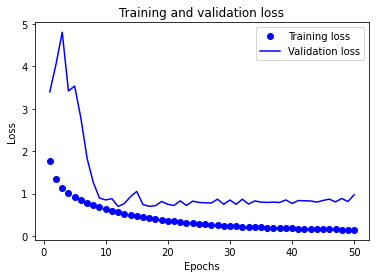

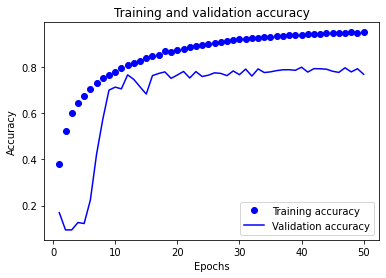

313/313 [==============================] - 1s 3ms/step - loss: 0.9898 - accuracy: 0.7648
['loss', 'accuracy']
[0.9897609949111938, 0.7648000121116638]
        loss  accuracy  val_loss  val_accuracy
45  0.161143  0.944667  0.869989       0.77584
46  0.160156  0.945227  0.805394       0.79576
47  0.144584  0.949573  0.885955       0.77800
48  0.152338  0.947627  0.813982       0.79184
49  0.148846  0.949600  0.974247       0.76776


Total amount of time to execute this process is:  117.2773768901825


In [10]:
start = time.time()

backend.clear_session()
model = models.Sequential()

# Layer 1: Input Data and Convnet with Max_Pooling, BatchNormalization and Dropout
model.add(layers.Conv2D(30, (3, 3), activation='relu', padding='same', strides=1, input_shape=training_data.shape[1:],))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.2))

# Layer 2: Convnet with Max_Pooling, BatchNormalization and Dropout
model.add(layers.Conv2D(120, (3, 3), activation='relu', padding='same', strides=1))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.2))

# # Layer 3: Convnet with Max_Pooling, BatchNormalization and Dropout
model.add(layers.Conv2D(240, (3, 3), activation='relu', padding='same', strides=1))
model.add(BatchNormalization())
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(Flatten())

# Layer 4: Fully connected
model.add(layers.Dense(120, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))

# Layer 5: Fully connected
model.add(layers.Dense(30, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))

# Layer 6: Output
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_data, training_label,
                    epochs = 50,
                    batch_size = 512,
                    validation_data = (val_data, val_label),
                    verbose = 1,
                    callbacks = [EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(test_data, test_label)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))


Epoch 1/200
74/74 [==============================] - 3s 44ms/step - loss: 2.1270 - accuracy: 0.3234 - val_loss: 3.0703 - val_accuracy: 0.0946
Epoch 2/200
74/74 [==============================] - 3s 35ms/step - loss: 1.5447 - accuracy: 0.4580 - val_loss: 3.0603 - val_accuracy: 0.1228
Epoch 3/200
74/74 [==============================] - 3s 35ms/step - loss: 1.2957 - accuracy: 0.5391 - val_loss: 3.1519 - val_accuracy: 0.1265
Epoch 4/200
74/74 [==============================] - 3s 35ms/step - loss: 1.1226 - accuracy: 0.6015 - val_loss: 3.1904 - val_accuracy: 0.1517
Epoch 5/200
74/74 [==============================] - 3s 35ms/step - loss: 1.0106 - accuracy: 0.6427 - val_loss: 2.4830 - val_accuracy: 0.2284
Epoch 6/200
74/74 [==============================] - 3s 35ms/step - loss: 0.9270 - accuracy: 0.6729 - val_loss: 1.7105 - val_accuracy: 0.4117
Epoch 7/200
74/74 [==============================] - 3s 35ms/step - loss: 0.8718 - accuracy: 0.6969 - val_loss: 1.3407 - val_accuracy: 0.5386
Epoch 

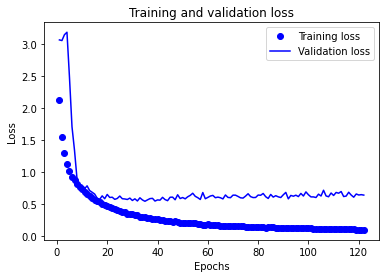

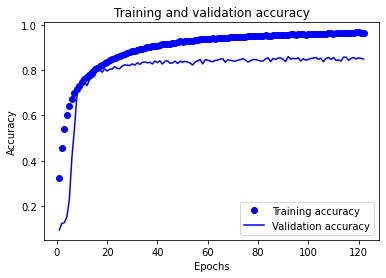

313/313 [==============================] - 1s 3ms/step - loss: 0.5918 - accuracy: 0.8541
['loss', 'accuracy']
[0.5917872786521912, 0.8540999889373779]
         loss  accuracy  val_loss  val_accuracy
117  0.103539  0.963867  0.606879       0.85600
118  0.094241  0.966107  0.656980       0.84848
119  0.096150  0.967040  0.641156       0.85416
120  0.100662  0.964773  0.646493       0.85208
121  0.099964  0.965893  0.639541       0.84832


Total amount of time to execute this process is:  325.8090064525604


In [0]:
start = time.time()

backend.clear_session()
model = models.Sequential()

# I have found the model from this website: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
# And it gave me the best result. I could not best it unfortunately.

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))) # outputs 32x32x32 (32768)
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_data, training_label,
                    epochs = 200,
                    batch_size = 512,
                    validation_data = (val_data, val_label),
                    verbose = 1,
                    callbacks = [EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(test_data, test_label)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))